In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [4]:
start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

In [5]:
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

In [6]:
df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2024-02-20  181.789993  182.429993  180.000000  181.559998  181.314072   
       2024-02-21  181.940002  182.889999  180.660004  182.320007  182.073059   
       2024-02-22  183.479996  184.960007  182.460007  184.369995  184.120270   
       2024-02-23  185.009995  185.039993  182.229996  182.520004  182.272781   
       2024-02-26  182.240005  182.759995  180.649994  181.160004  180.914627   

                     Volume  
Ticker Date                  
AAPL   2024-02-20  53665600  
       2024-02-21  41529700  
       2024-02-22  52292200  
       2024-02-23  45119700  
       2024-02-26  40867400  


In [8]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2024-02-20  181.789993  182.429993  180.000000  181.559998   
1   AAPL 2024-02-21  181.940002  182.889999  180.660004  182.320007   
2   AAPL 2024-02-22  183.479996  184.960007  182.460007  184.369995   
3   AAPL 2024-02-23  185.009995  185.039993  182.229996  182.520004   
4   AAPL 2024-02-26  182.240005  182.759995  180.649994  181.160004   

    Adj Close    Volume  
0  181.314072  53665600  
1  182.073059  41529700  
2  184.120270  52292200  
3  182.272781  45119700  
4  180.914627  40867400  


In [11]:
!pip install plotly

In [14]:
import plotly.express as px

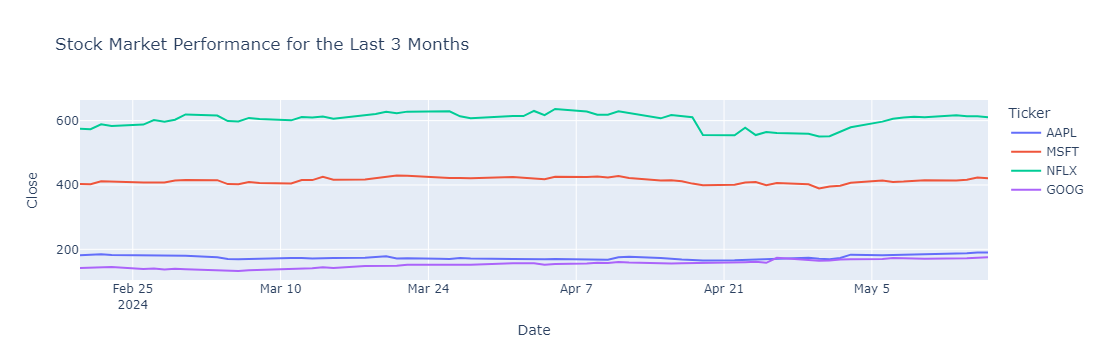

In [17]:
fig = px.line(df, x='Date',y='Close',color='Ticker',title="Stock Market Performance for the Last 3 Months")
fig.show()

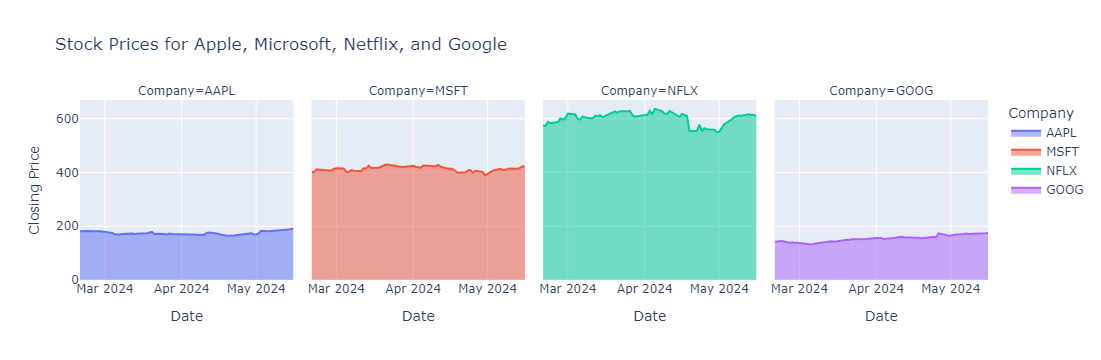

In [19]:
fig = px.area(df, x='Date', y='Close', color='Ticker',facet_col='Ticker',labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, and Google')
fig.show()

In [20]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

In [21]:
for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
57  178.401003  173.353501
58  179.679002  174.033001
59  181.389001  174.935500
60  183.431001  176.021500
61  185.112001  177.161501

[62 rows x 2 columns]
Moving Averages for GOOG
           MA10        MA20
186         NaN         NaN
187         NaN         NaN
188         NaN         NaN
189         NaN         NaN
190         NaN         NaN
..          ...         ...
243  169.140001  164.220001
244  169.440001  164.948501
245  170.169000  165.745000
246  171.000000  166.595000
247  171.696999  167.493500

[62 rows x 2 columns]
Moving Averages for MSFT
           MA10        MA20
62          NaN         NaN
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
..          ...         ...
119  405.150000  405.89

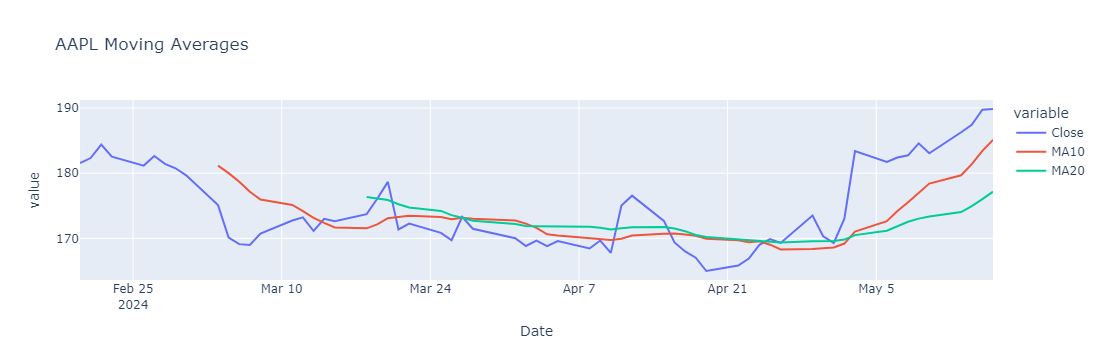

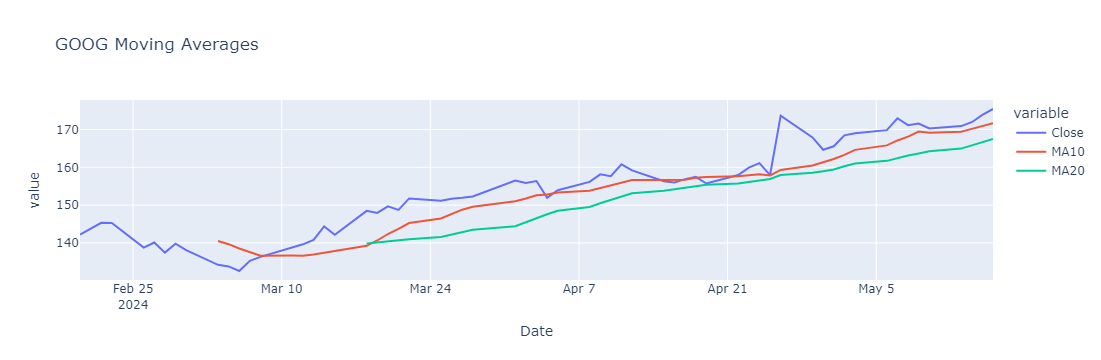

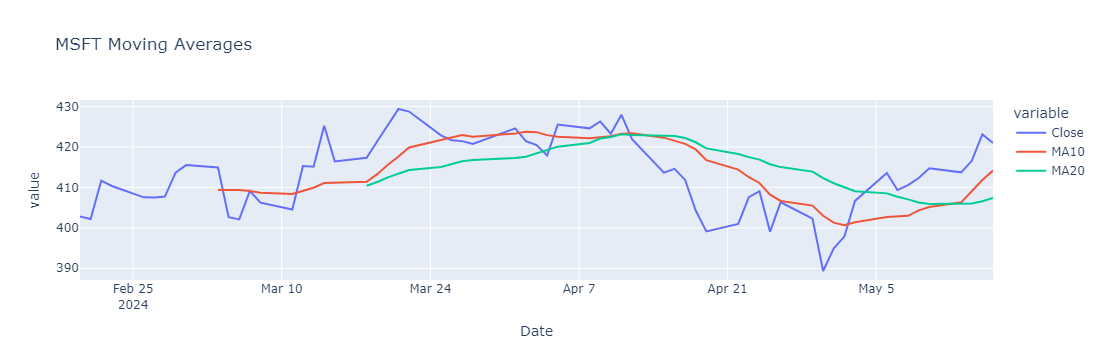

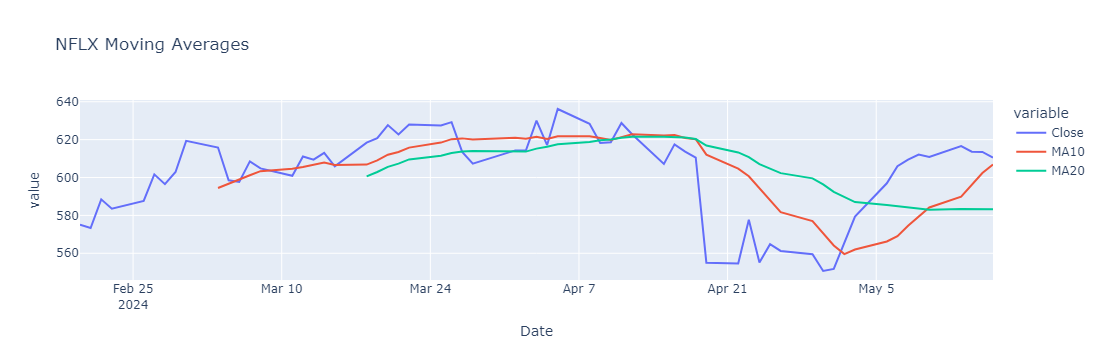

In [22]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

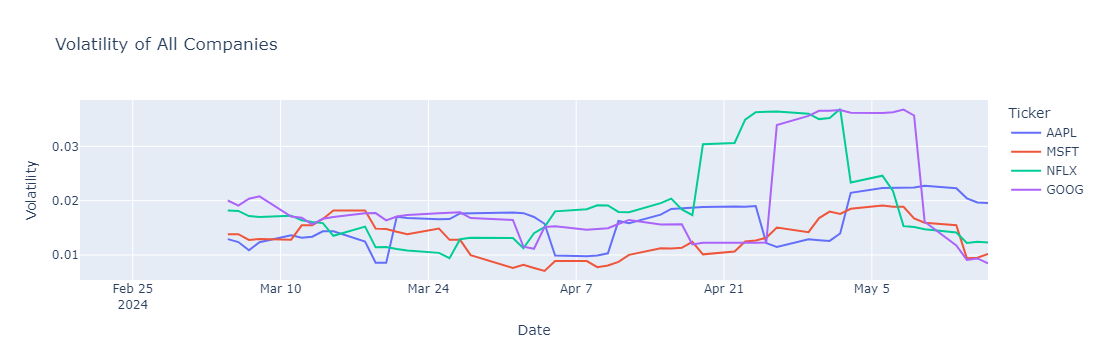

In [23]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

In [24]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='Date')

In [27]:
!pip install statsmodels

   ---------------------------------------- 9.9/9.9 MB 433.2 kB/s eta 0:00:00
   -------------------------------------- 233.9/233.9 kB 650.3 kB/s eta 0:00:00


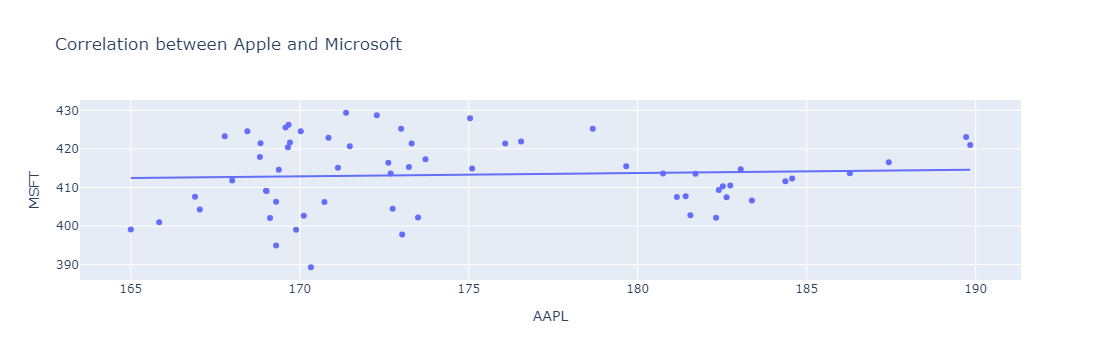

In [28]:
# creating a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT', trendline='ols', title='Correlation between Apple and Microsoft')
fig.show()